# Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [2]:
#Импортируйте библиотеки pandas, numpy и matplotlib.
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
%matplotlib inline

In [4]:
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
boston = load_boston()
# Создайте датафреймы X и y из этих данных. 
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [7]:
#  Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Масштабируйте данные с помощью StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [10]:
#Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. 
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


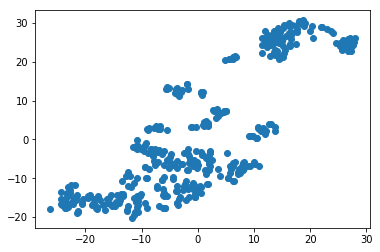

In [11]:
# Постройте диаграмму рассеяния на этих данных.
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

# Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


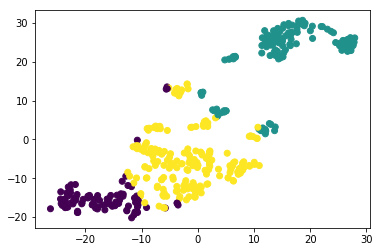

In [14]:
from sklearn.cluster import KMeans
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
model = KMeans(n_clusters=3,max_iter=100, random_state=42)

kmeans = KMeans(n_clusters=3)
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [28]:
labels_test = kmeans.predict(X_test_scaled)
#Вычислите средние значения price 
print("средняя цена: ",y_train.mean())
print("средняя цена в кластере 1: ", y_train[labels_train == 0].mean())
print("средняя цена в кластере 2: ", y_train[labels_train == 1].mean())
print("средняя цена в кластере 3: ", y_train[labels_train == 2].mean())


средняя цена:  22.796534653465343
средняя цена в кластере 1:  27.78837209302326
средняя цена в кластере 2:  16.1796875
средняя цена в кластере 3:  24.99473684210526


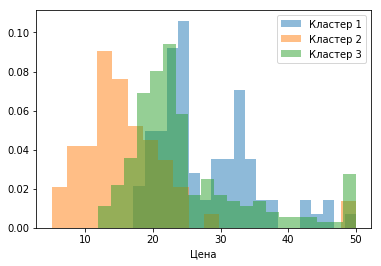

In [29]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер 1', 'Кластер 2','Кластер 3'])
plt.xlabel('Цена')

plt.show()

In [26]:
#Вычислите средние значения CRIM 

print('Кластер 1: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 3: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 1: 0.07356558139534886
Кластер 2: 10.715219062500003
Кластер 3: 0.4221666842105262


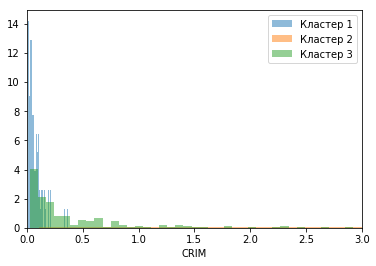

In [41]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=40, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=40, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=40, density=True, alpha=0.5)
plt.xlim(0, 3)
plt.legend(['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.xlabel('CRIM')

plt.show()

# * Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


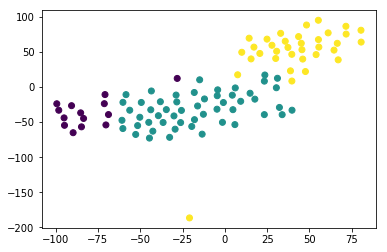

In [45]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

model = KMeans(n_clusters=3,max_iter=100, random_state=42)


labels_test = model.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [48]:
#Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
print("средняя цена: ", y_test.mean())
print("средняя цена в кластере 1: ", y_test[labels_test == 0].mean())
print("средняя цена в кластере 2: ", y_test[labels_test == 1].mean())
print("средняя цена в кластере 3: ", y_test[labels_test == 2].mean())
print('Кластер 1: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 3: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

средняя цена:  21.488235294117644
средняя цена в кластере 1:  33.871428571428574
средняя цена в кластере 2:  21.552830188679245
средняя цена в кластере 3:  16.43714285714286
Кластер 1: 0.08618571428571427
Кластер 2: 0.25200716981132076
Кластер 3: 10.165531142857143


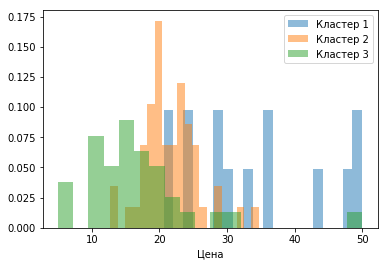

In [49]:
plt.hist(y_test[labels_test == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 2], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер 1', 'Кластер 2','Кластер 3'])
plt.xlabel('Цена')

plt.show()

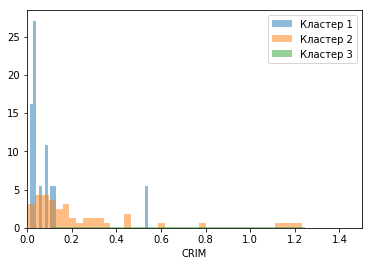

In [52]:
plt.hist(X_test.loc[labels_test == 0, 'CRIM'], bins=40, density=True, alpha=0.5)
plt.hist(X_test.loc[labels_test == 1, 'CRIM'], bins=40, density=True, alpha=0.5)
plt.hist(X_test.loc[labels_test == 2, 'CRIM'], bins=40, density=True, alpha=0.5)
plt.xlim(0, 1.5)
plt.legend(['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.xlabel('CRIM')

plt.show()